<a href="https://colab.research.google.com/github/Legacy560/MLTSA25_RWolynetz/blob/main/labs/Workshop_Plotting_and_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [6]:
url = "https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/refs/heads/main/data/grb050525A.csv"
grabAg = pd.read_csv(url)

In [8]:
grabAg.columns

Index(['filter', 'time', 'mag', 'magerr', 'upperlimit'], dtype='object')

In [9]:
grabAg[['time', 'mag', 'magerr', 'upperlimit']].corr()

#There are NaNs here. We have some missing values.

,time,mag,magerr,upperlimit
time,1.000000,0.846971,0.517663,0.506833
mag,0.846971,1.000000,0.602576,NaN
magerr,0.517663,0.602576,1.000000,0.999288
upperlimit,0.506833,NaN,0.999288,1.000000


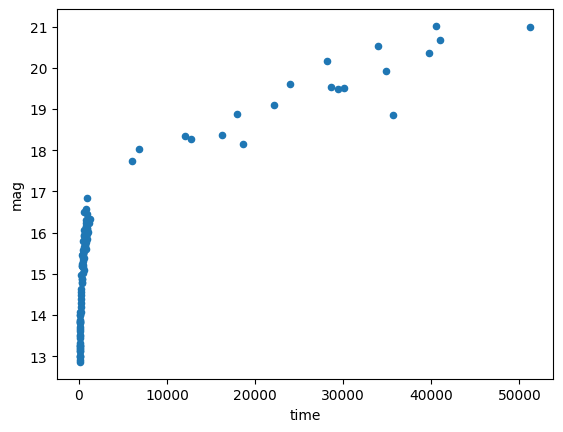

In [11]:
grabAg.plot(x='time', y='mag', kind = "scatter");

We can log transform this plot.

In [12]:
import numpy as np
x = np.arange(0,100,0.1)
y = x.copy()


<ipython-input-16-618dc69ae6b0>:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(x,np.log10(y));


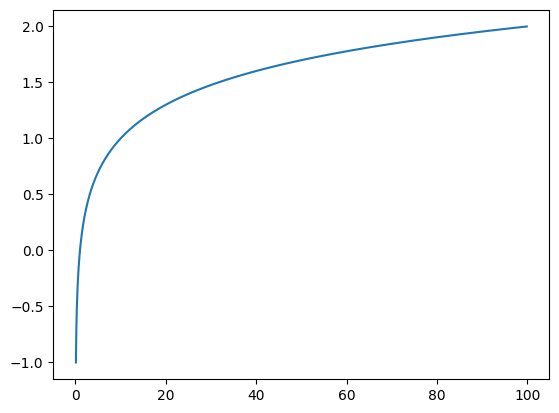

In [16]:
import pylab as plt
#plt.plot(x,y);
plt.plot(x,np.log10(y));

(24.0, 11.7)

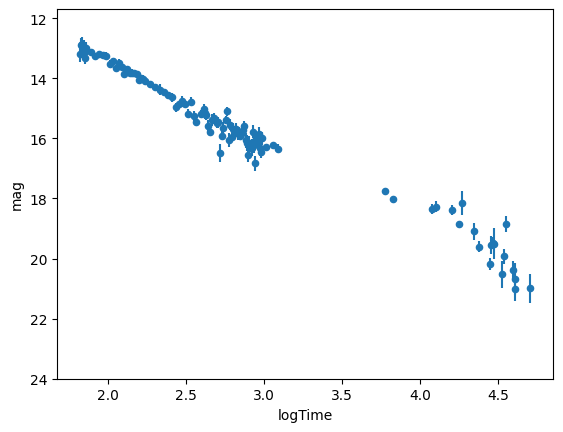

In [23]:
grabAg['logTime'] = np.log10(grabAg.loc[:,"time"])

ax = grabAg.plot(x = "logTime", y = "mag", kind = "scatter", yerr = "magerr");

#Now let's fit a line to the data,

ax.set_ylim(24,11.7) #This inverts the plot (lower, upper)

In [32]:
#Note: fxns with _ are utility functions
#np.c_[np.ones_like]

x = grabAg["logTime"].values
X = np.c_[np.ones_like(x), x]
X

array([[1.        , 1.81954394],
       [1.        , 1.8260748 ],
       [1.        , 1.83250891],
       [1.        , 1.83884909],
       [1.        , 1.84509804],
       [1.        , 1.85125835],
       [1.        , 1.8573325 ],
       [1.        , 1.86332286],
       [1.        , 1.8920946 ],
       [1.        , 1.91907809],
       [1.        , 1.94448267],
       [1.        , 1.96848295],
       [1.        , 1.99122608],
       [1.        , 2.01283722],
       [1.        , 2.03342376],
       [1.        , 2.05307844],
       [1.        , 2.07188201],
       [1.        , 2.08990511],
       [1.        , 2.10720997],
       [1.        , 2.12385164],
       [1.        , 2.13987909],
       [1.        , 2.15533604],
       [1.        , 2.17026172],
       [1.        , 2.18469143],
       [1.        , 2.19865709],
       [1.        , 2.2121876 ],
       [1.        , 2.22530928],
       [1.        , 2.2380461 ],
       [1.        , 2.27184161],
       [1.        , 2.30535137],
       [1.

In [25]:
#Linear regression with sklearn (Very popular for machine learning)

from sklearn.linear_model import LinearRegression

#Instantiate the class
lr = LinearRegression()

y = grabAg["mag"]

lr.fit(x,y) #This expects x as a 2D object

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.